In [160]:
import numpy as np 
import pandas as pd 
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 



In [162]:
sns.set()

In [163]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


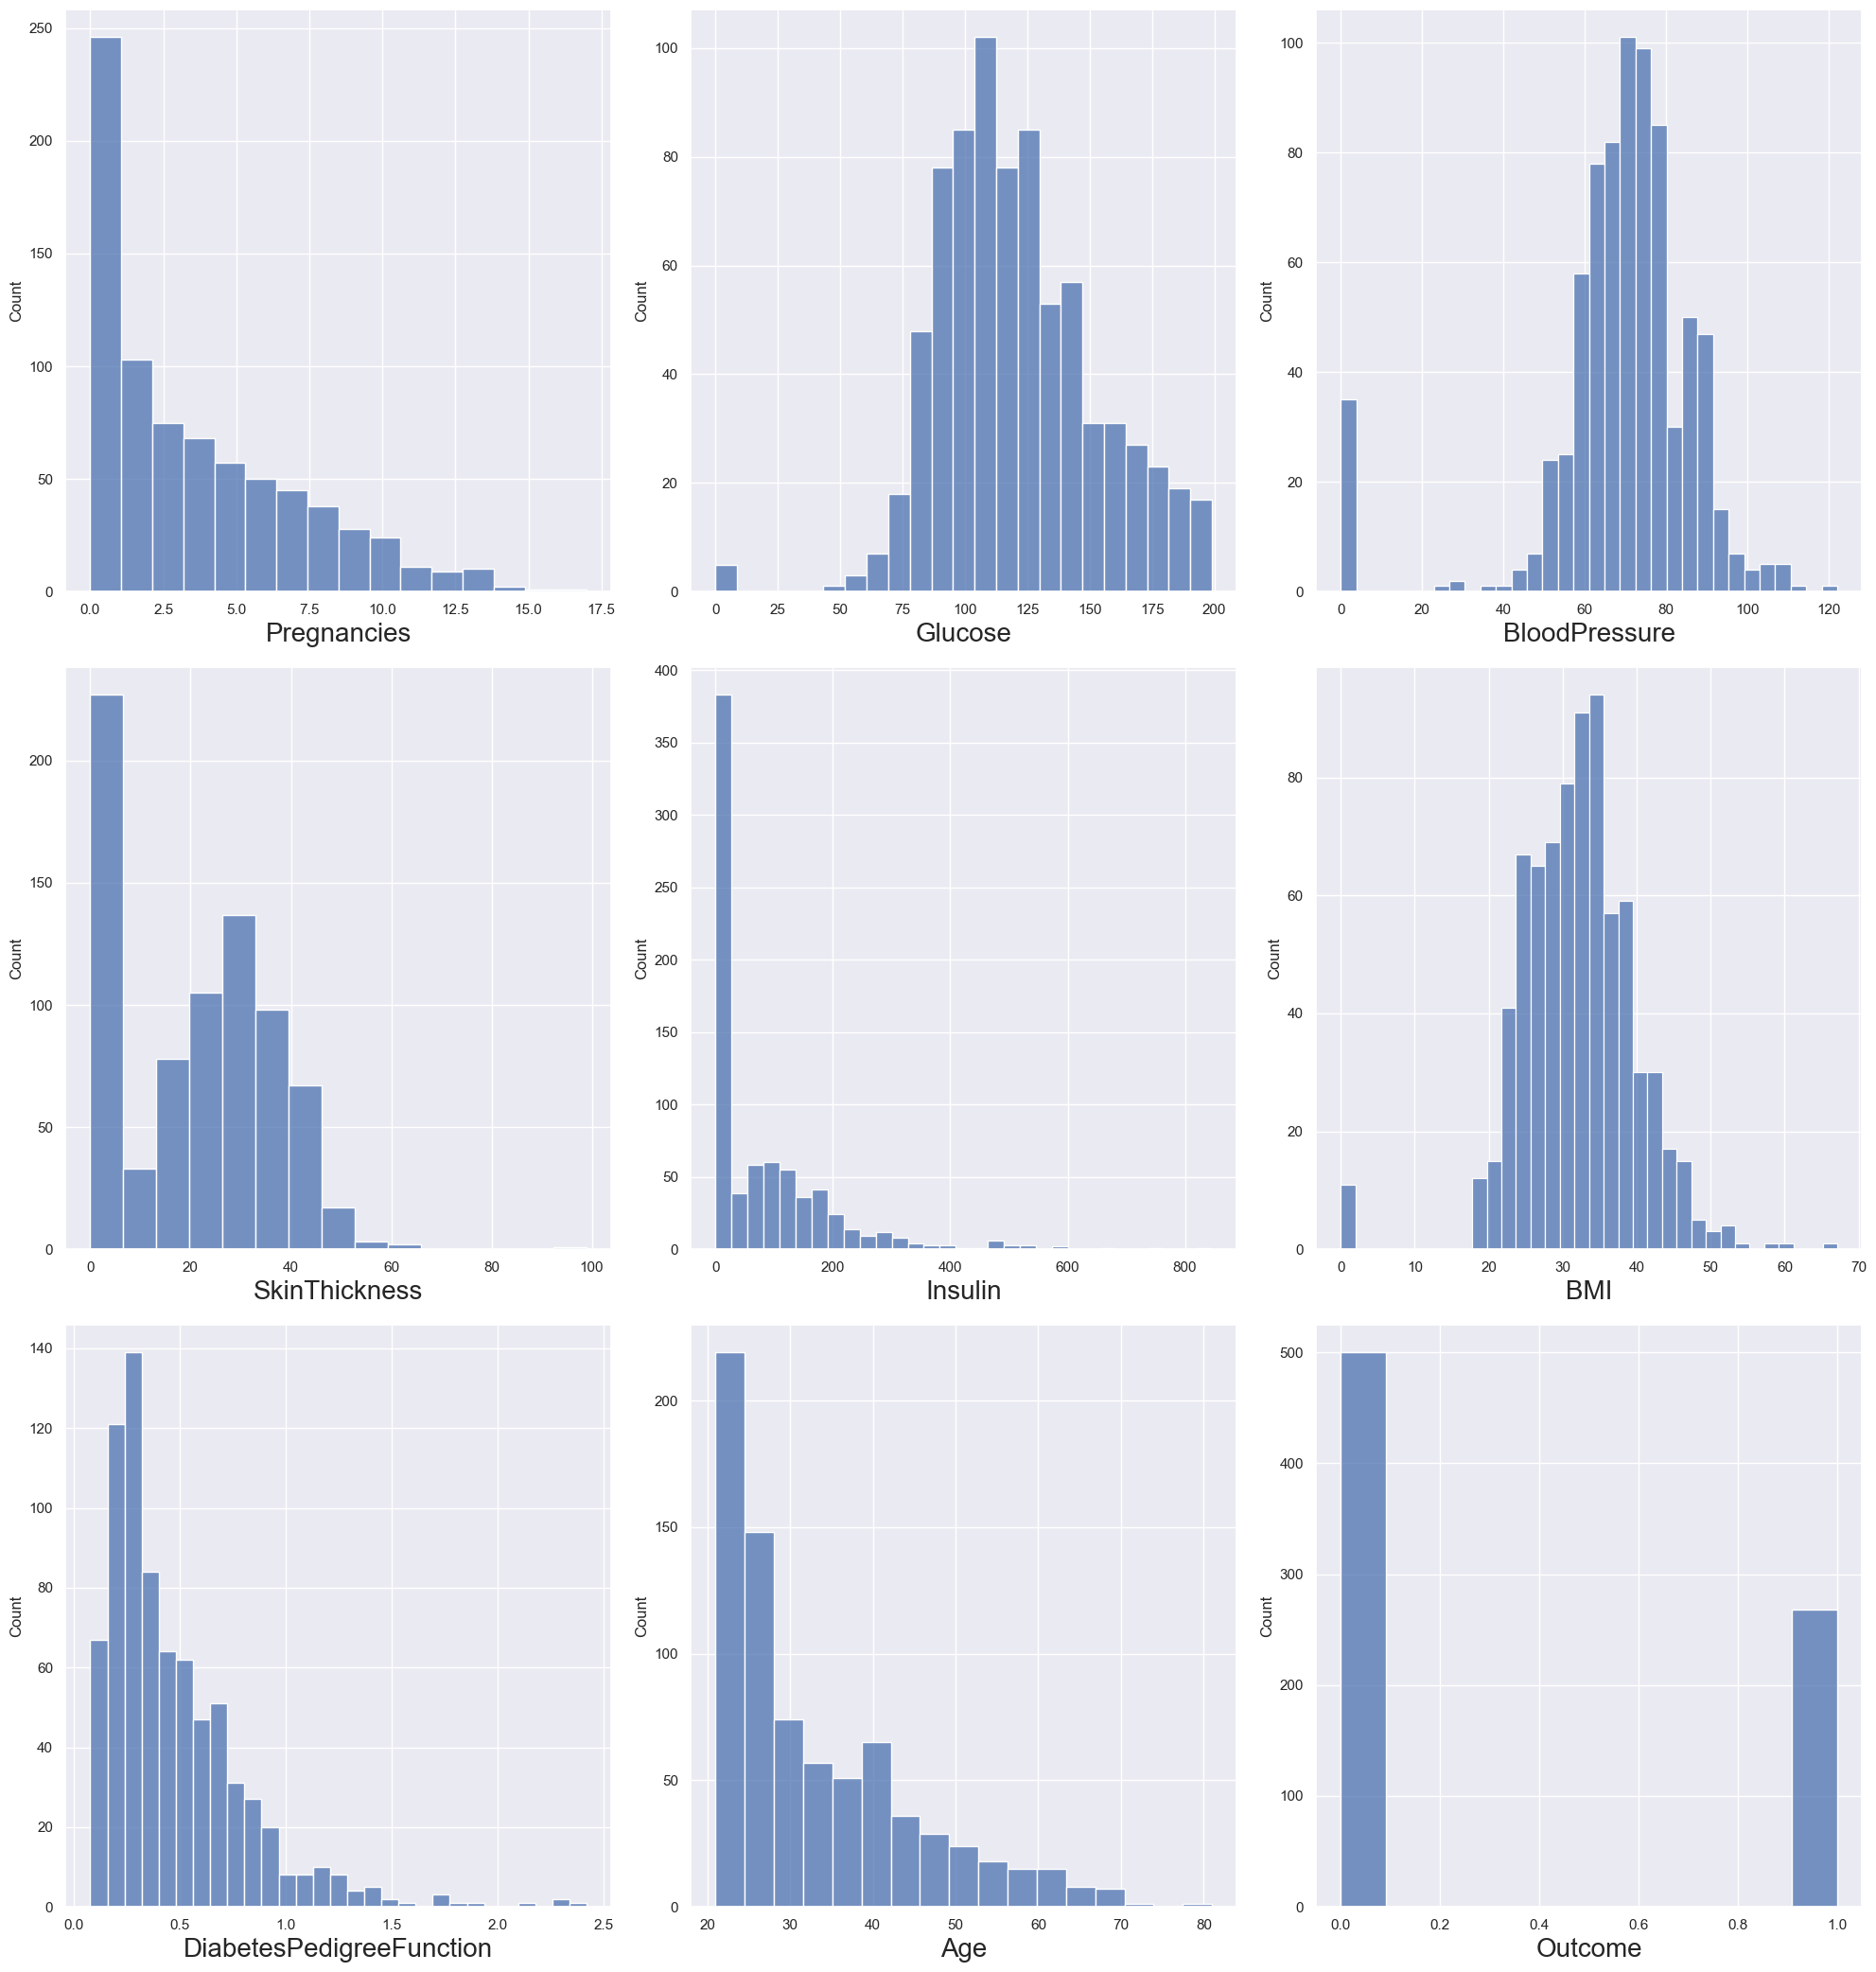

In [165]:

plt.figure(figsize=(20, 21), facecolor='white')
plotnumber = 1 

for column in data.columns: 
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], ax=ax)
        plt.xlabel(column, fontsize=20)  # Set the font size here
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [166]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

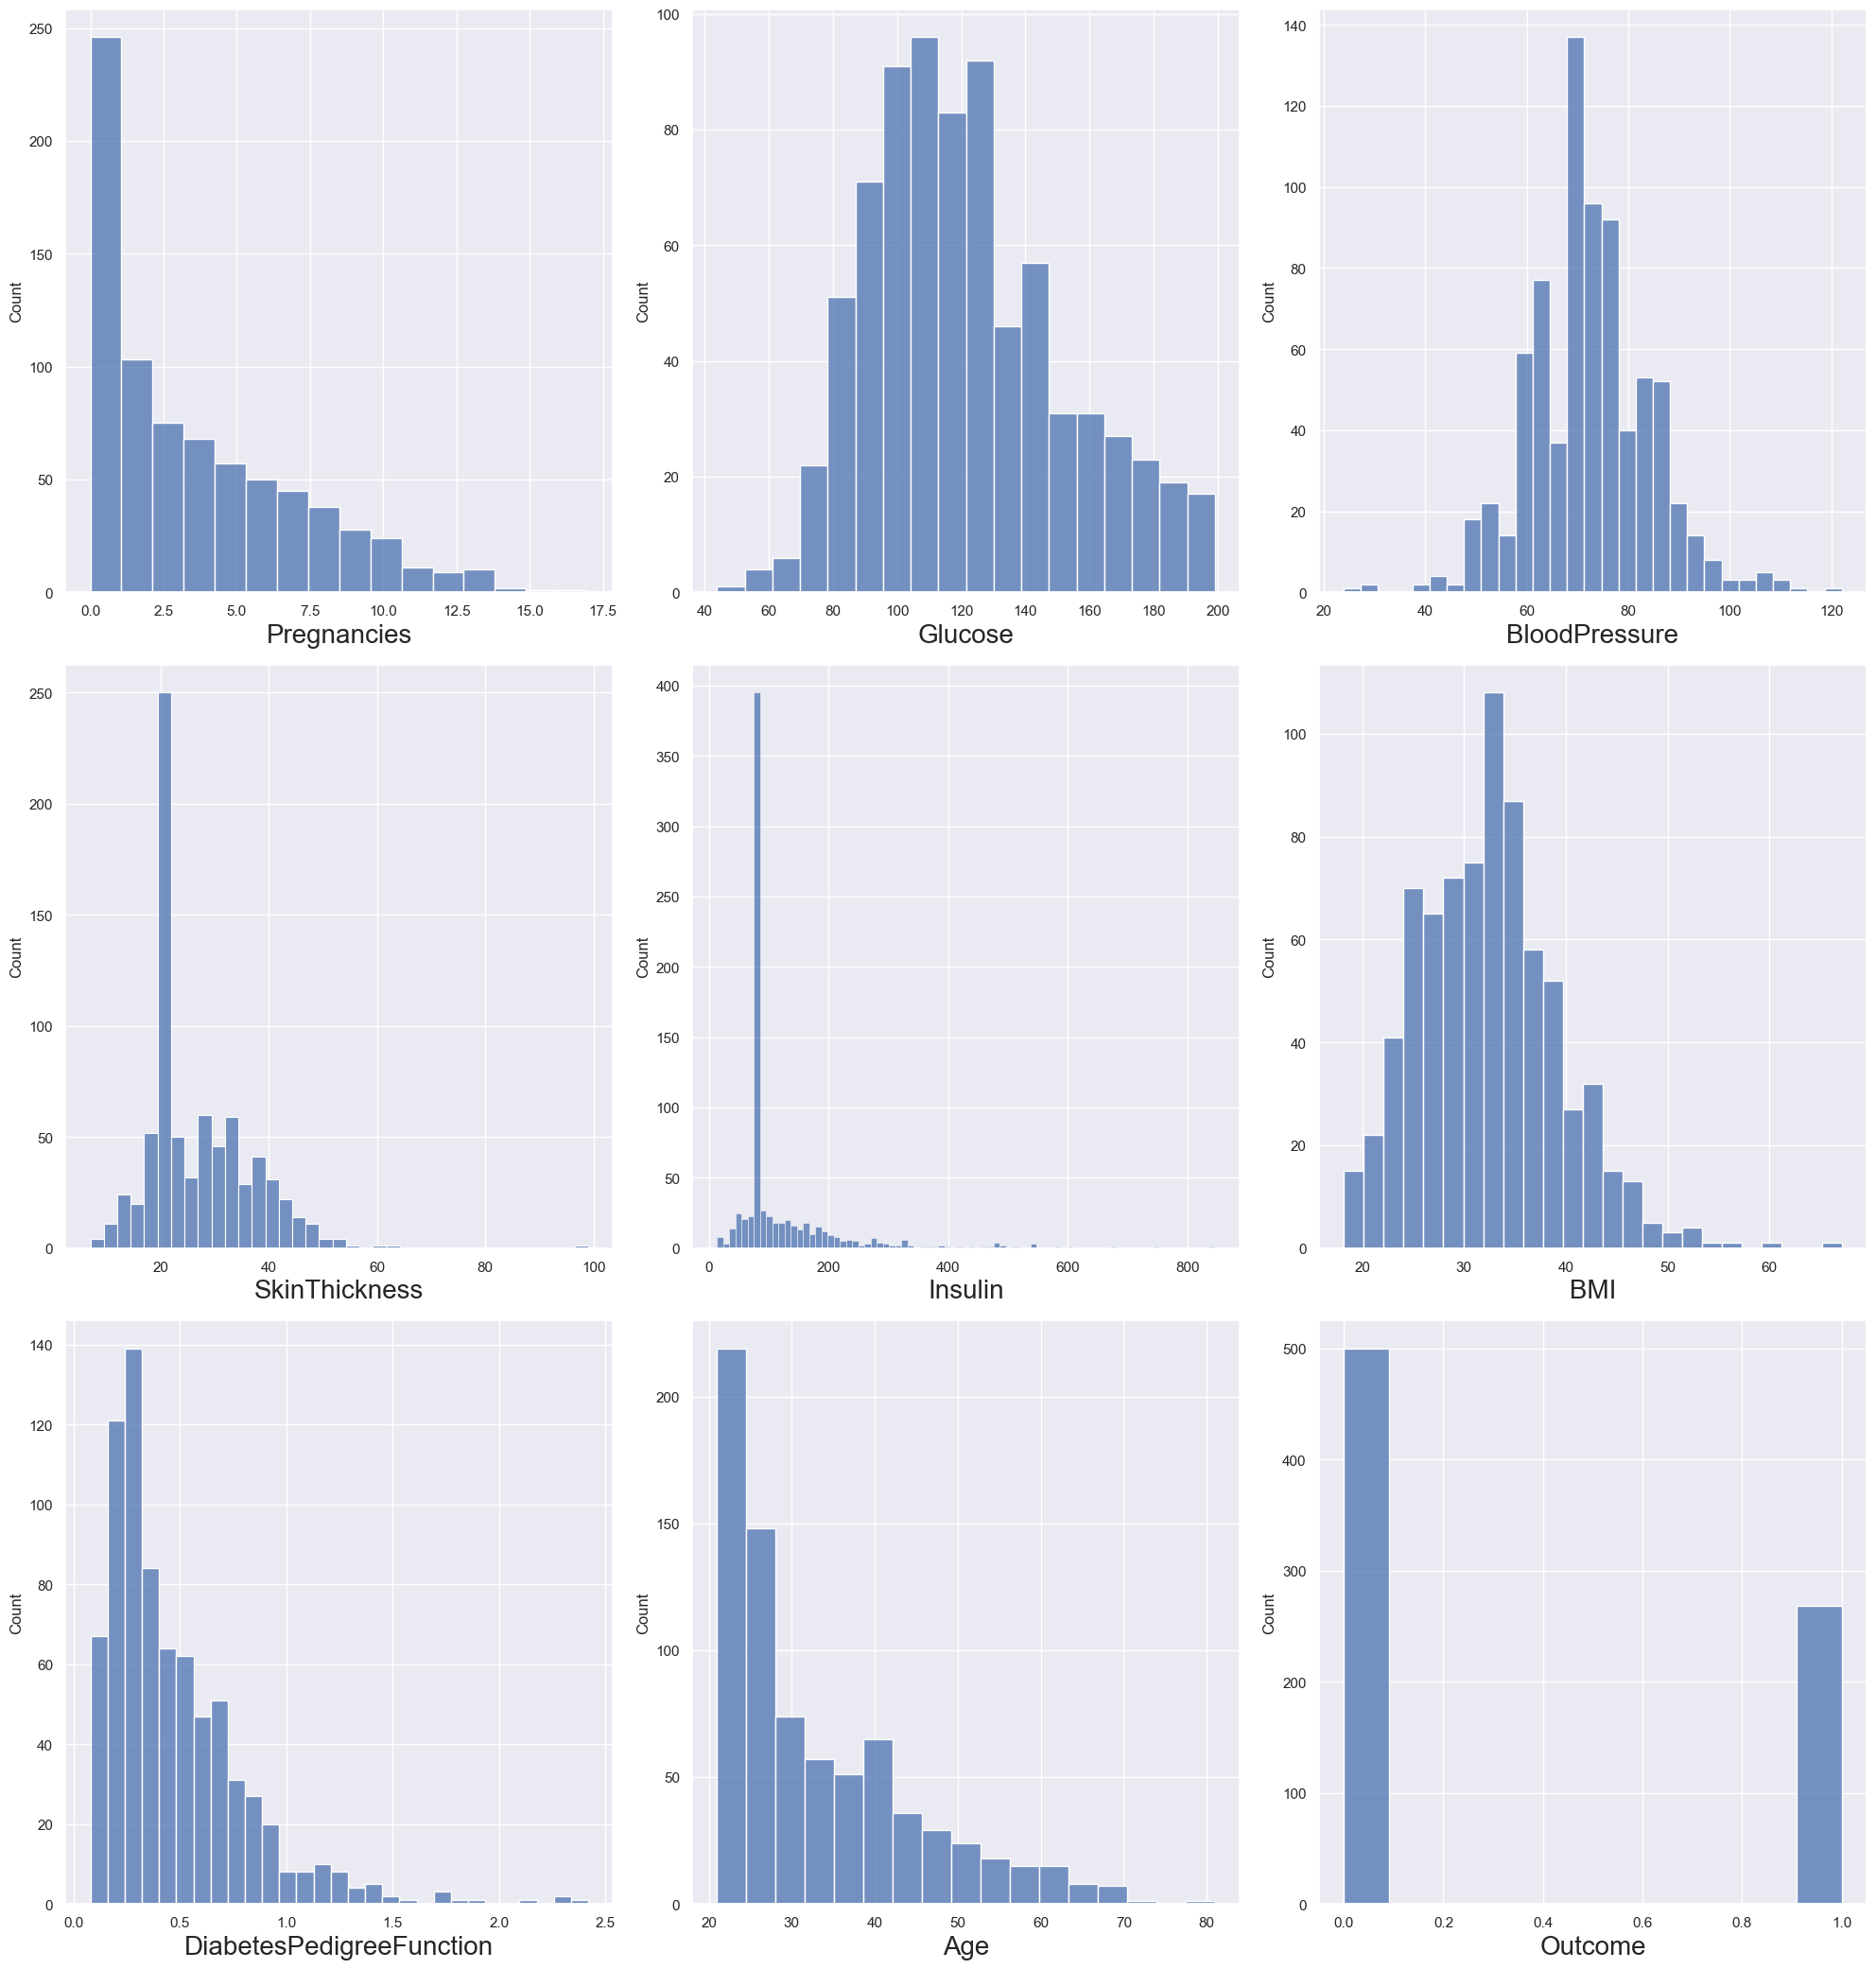

In [167]:

plt.figure(figsize=(20, 21), facecolor='white')
plotnumber = 1 

for column in data.columns: 
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], ax=ax)
        plt.xlabel(column, fontsize=20)  # Set the font size here
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

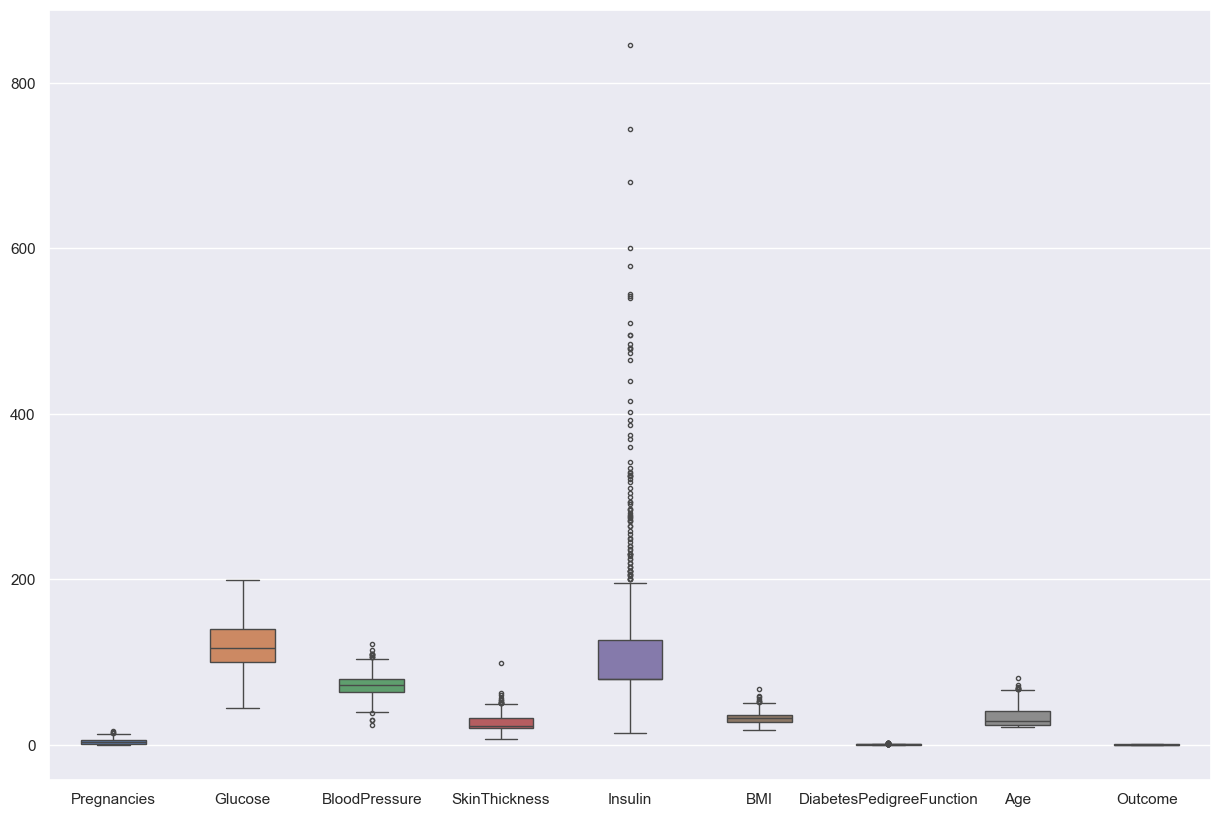

In [168]:
fig, ax = plt.subplots(figsize=(15, 10))  # Corrected plt.subplots()

sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

plt.show()


In [169]:
q =data['Pregnancies'].quantile(.98)
print(q)
data_cleared = data[data['Pregnancies']<q]

12.0


In [170]:
q =data_cleared['BMI'].quantile(0.99) 
print(q)
data_cleared = data_cleared[data_cleared['BMI']<q]

51.287999999999876


In [171]:
q =data_cleared['SkinThickness'].quantile(0.99) 
print(q)
data_cleared = data_cleared[data_cleared['SkinThickness']<q]



50.0


In [172]:
data_cleared.shape

(728, 9)

In [173]:
q =data_cleared['Insulin'].quantile(0.95) 
print(q)
data_cleared = data_cleared[data_cleared['Insulin']<q]

293.0


In [174]:
data_cleared.shape

(690, 9)

In [175]:
q =data_cleared['DiabetesPedigreeFunction'].quantile(0.99) 
print(q)
data_cleared = data_cleared[data_cleared['DiabetesPedigreeFunction']<q]


1.4896400000000016


In [176]:
q =data_cleared['Age'].quantile(0.99) 
print(q)
data_cleared = data_cleared[data_cleared['Age']<q]

67.0


In [177]:
data_cleared.shape

(674, 9)

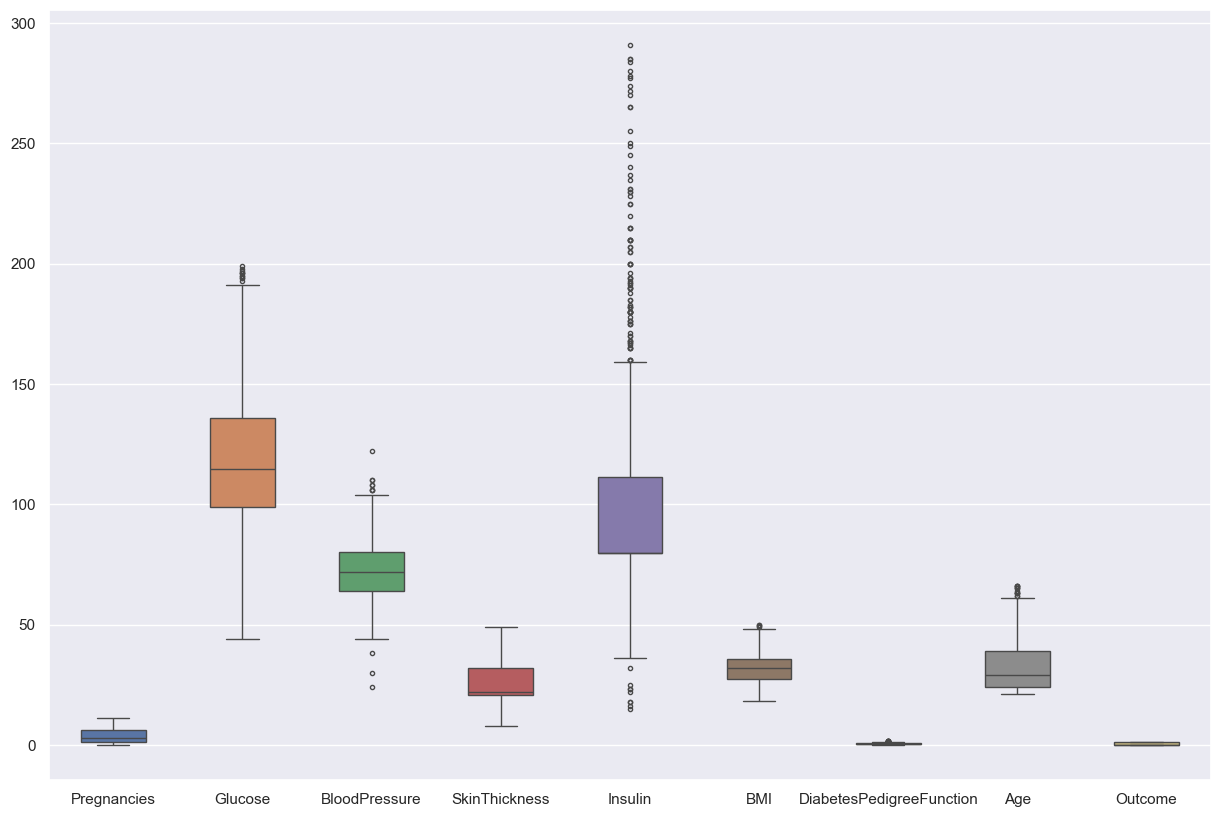

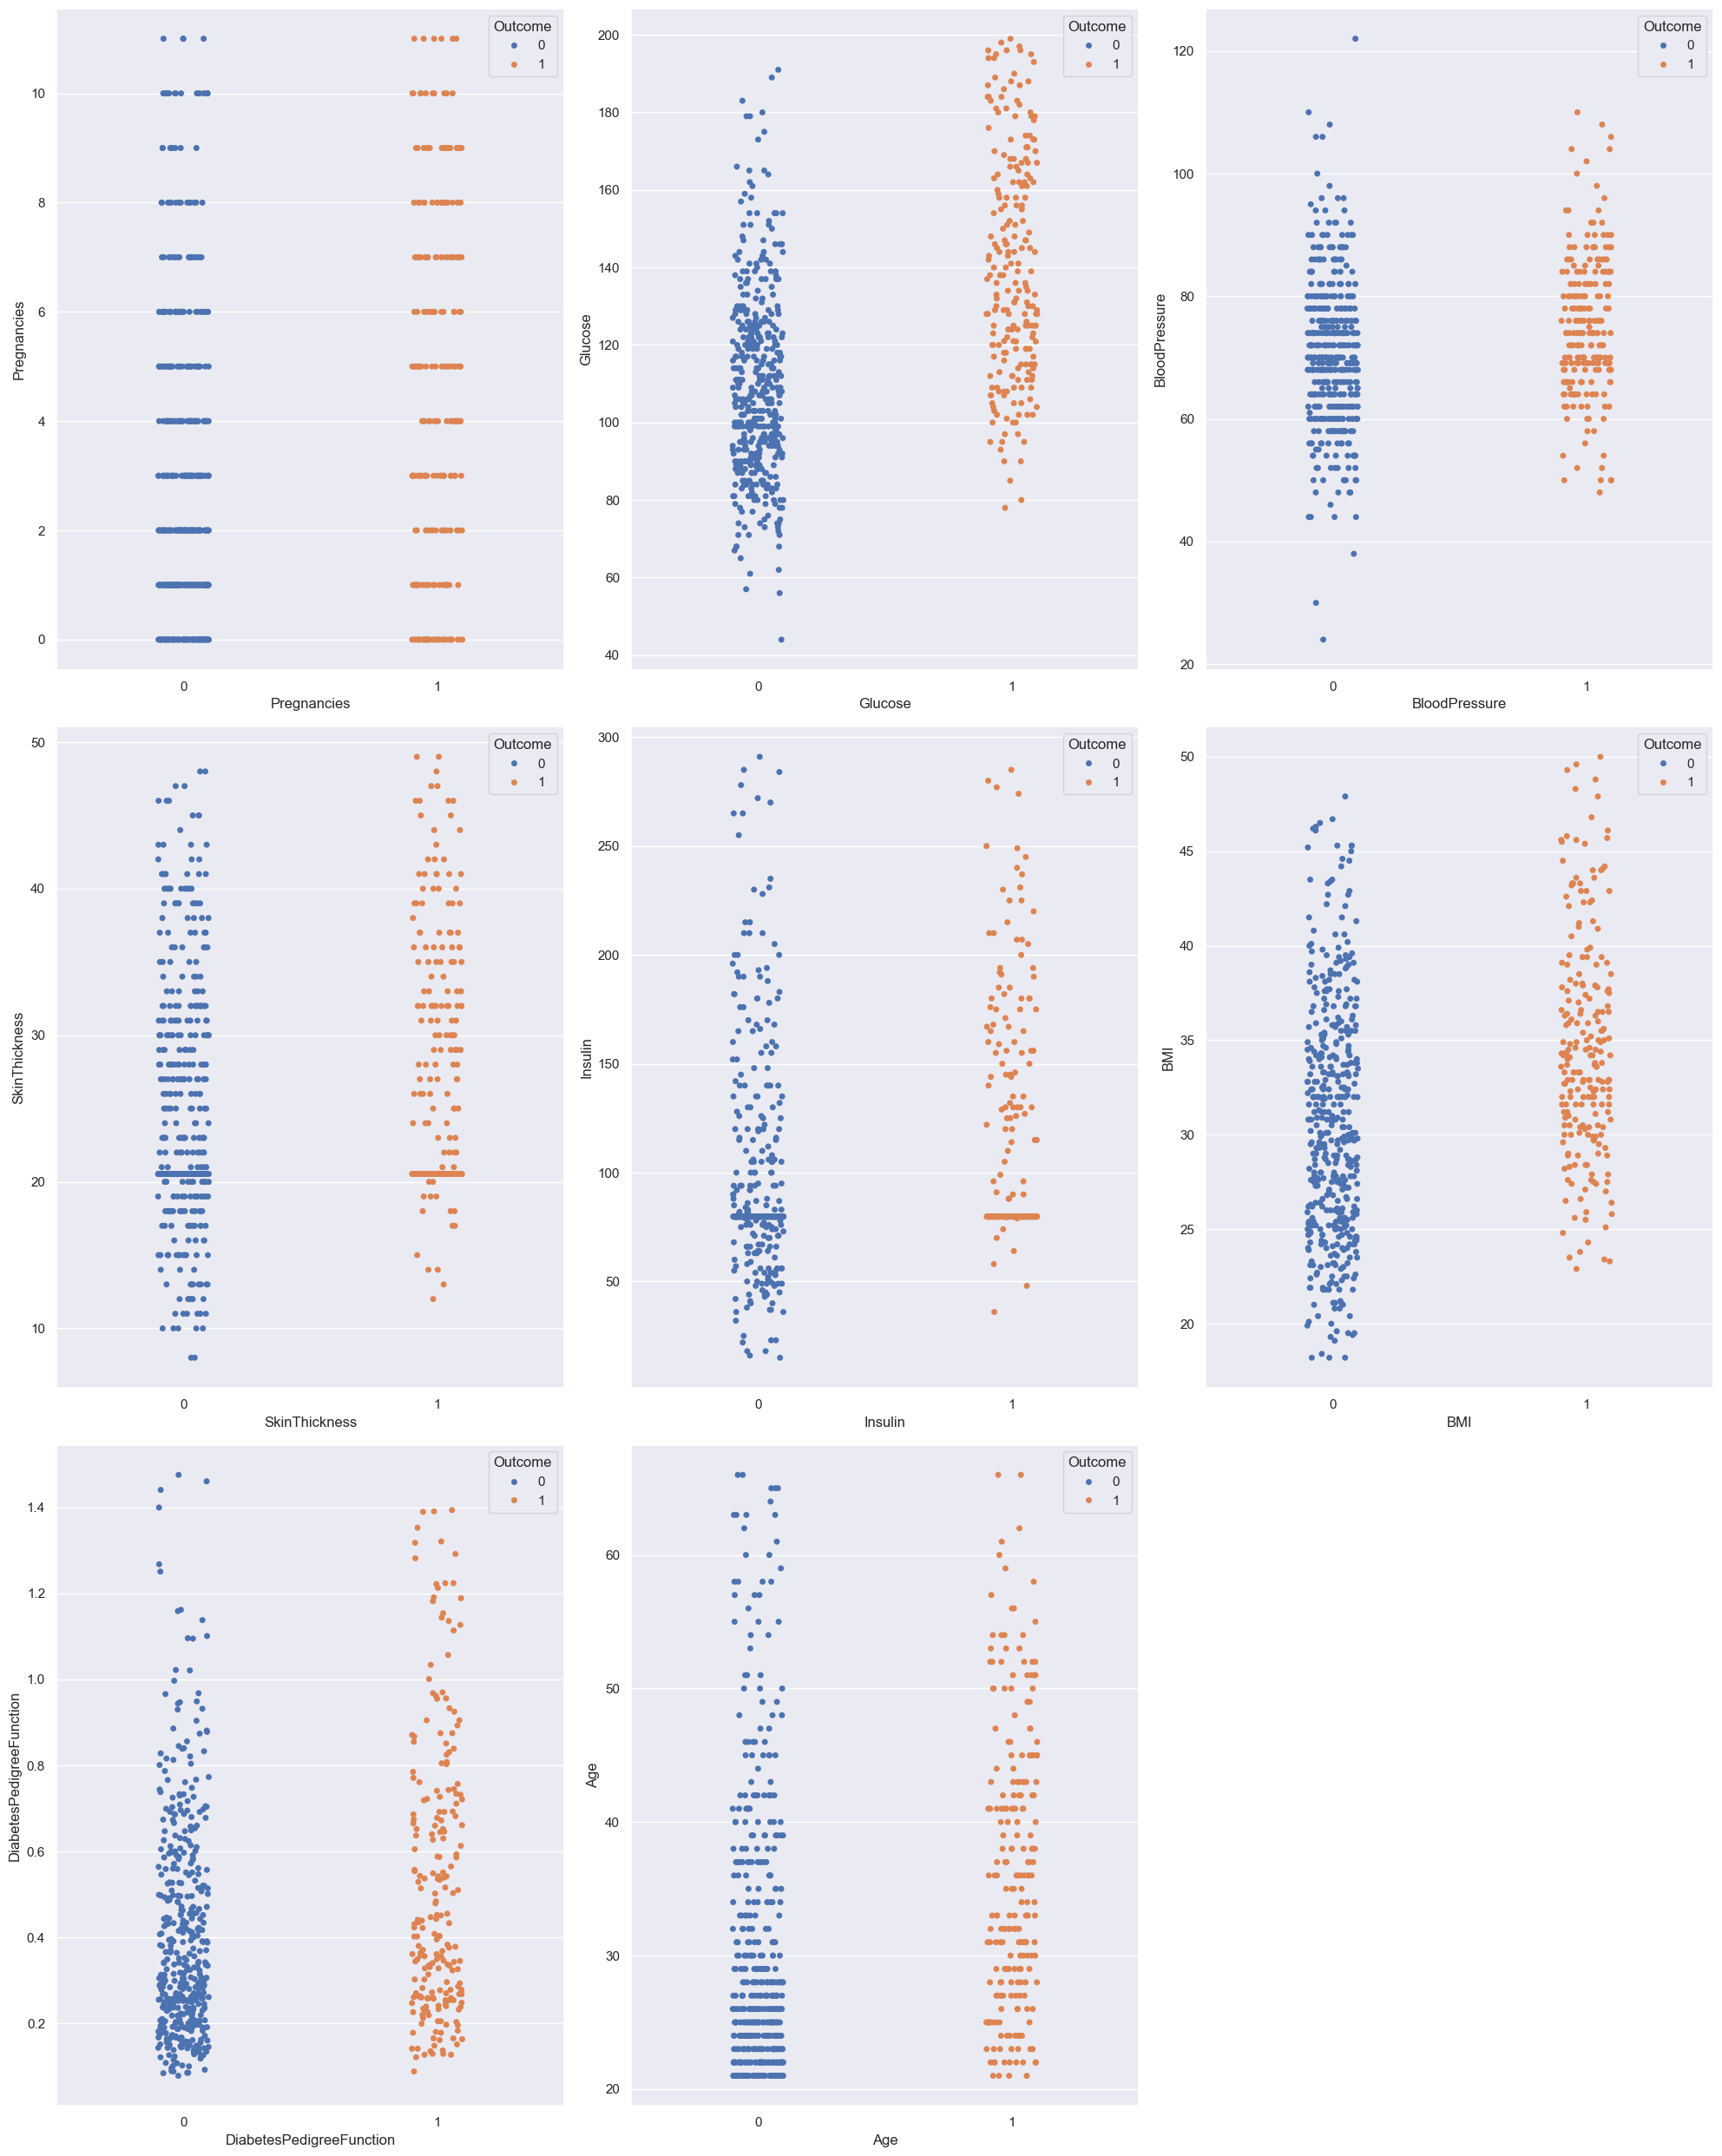

In [178]:
fig, ax = plt.subplots(figsize=(15, 10))  # Corrected plt.subplots()

sns.boxplot(data=data_cleared, width=0.5, ax=ax, fliersize=3)
x = data_cleared.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data_cleared['Outcome']

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1 

for column in x.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column], hue=y)  # Using strip plot instead of scatter plot
        plt.xlabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
plt.show()

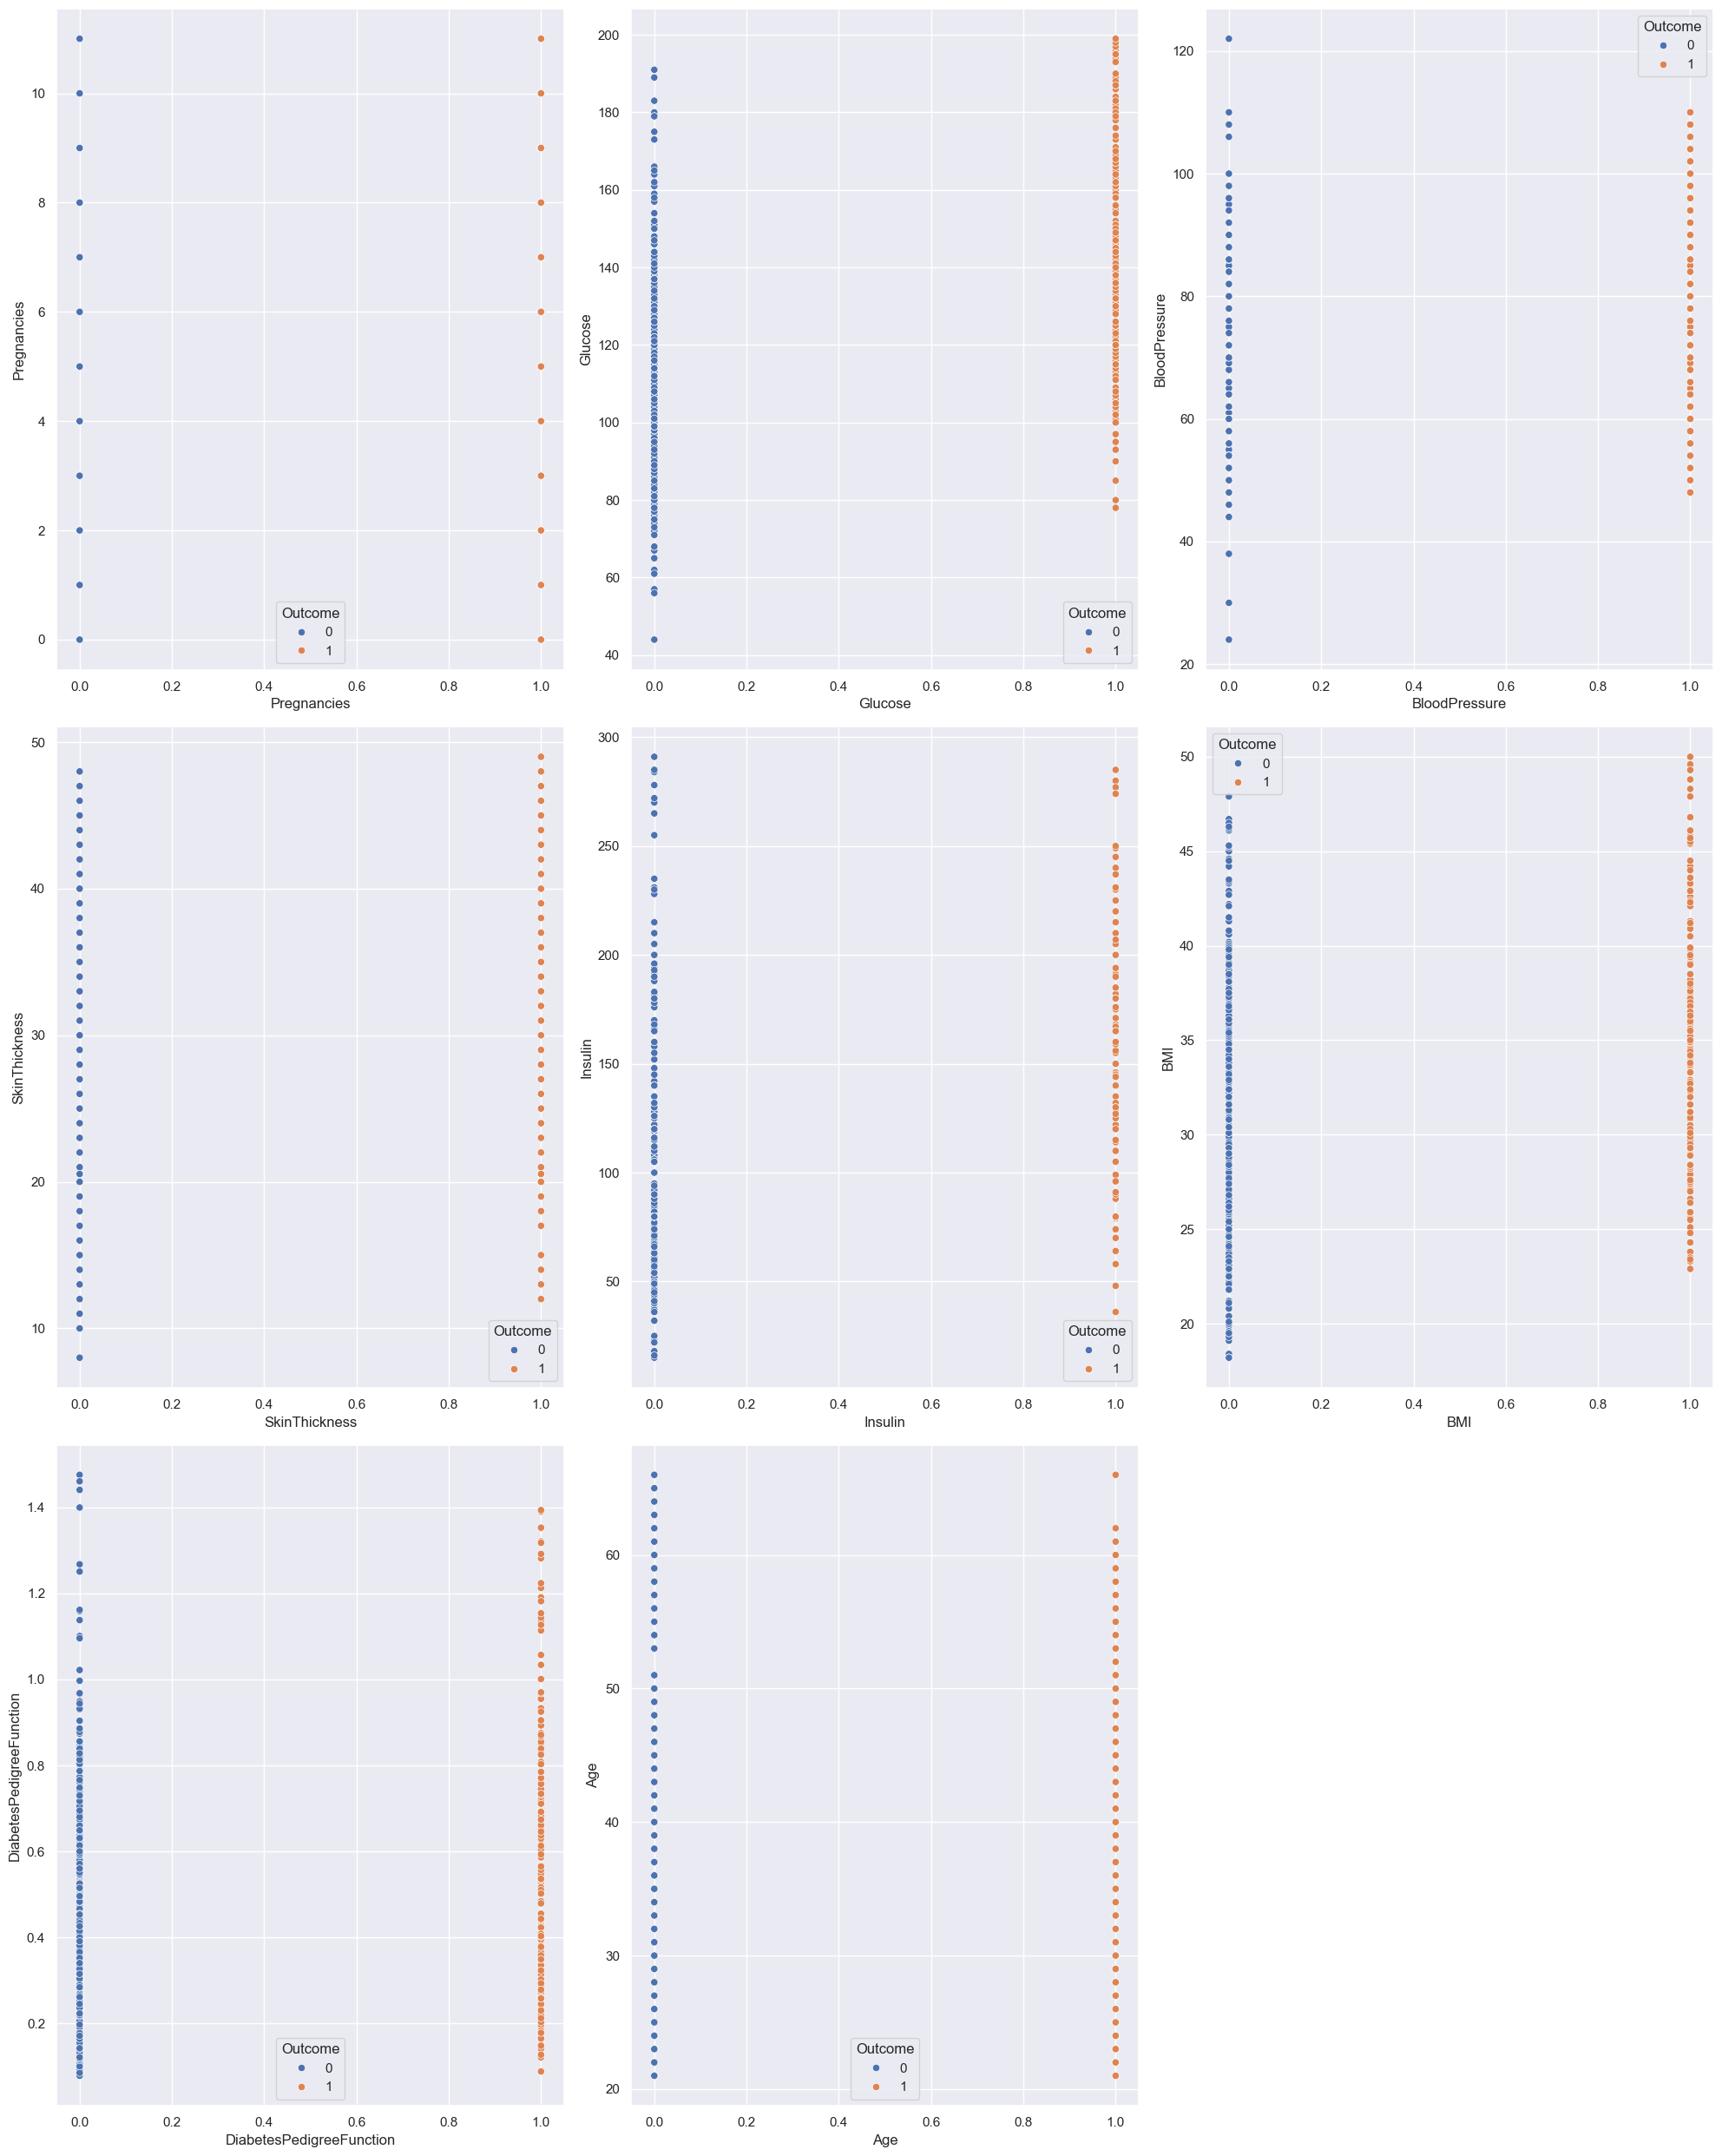

In [179]:
x = data_cleared.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data_cleared['Outcome']

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1 

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(x=y,y=x[column],hue=y)  # Using scatter plot instead of strip plot
        plt.xlabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


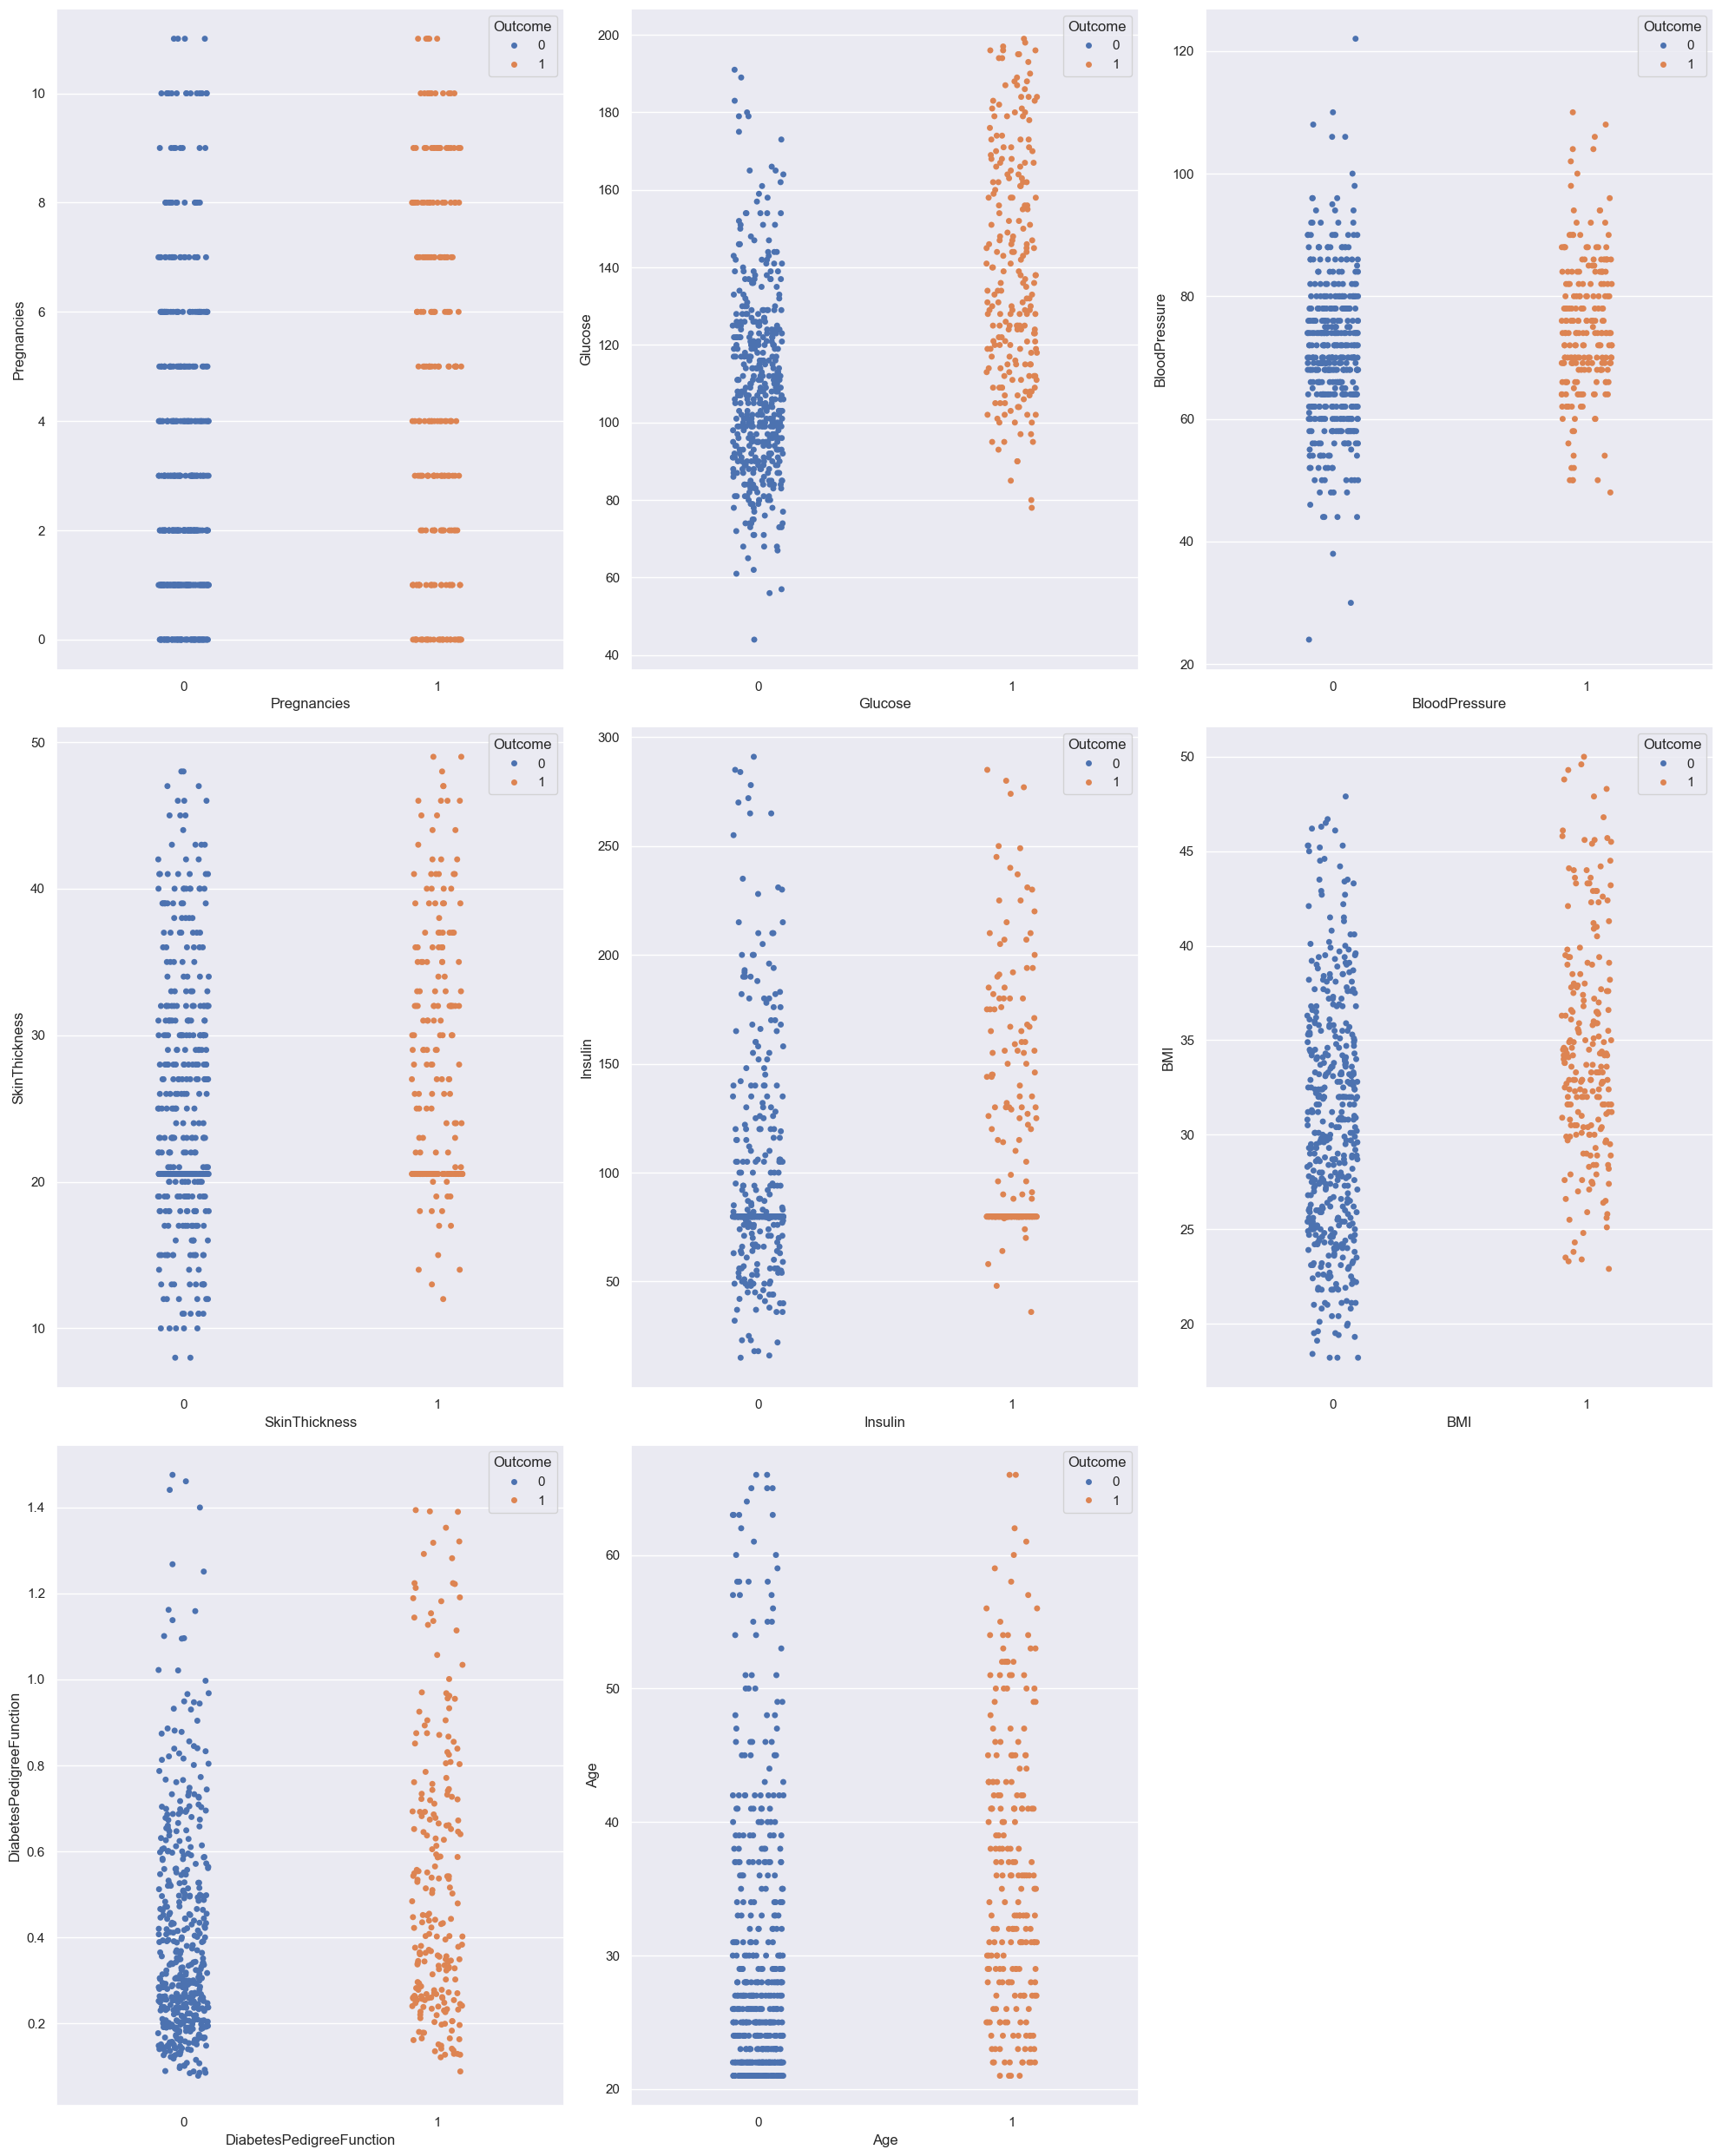

In [180]:
x = data_cleared.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data_cleared['Outcome']

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1 

for column in x.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column], hue=y)  # Using strip plot instead of scatter plot
        plt.xlabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [181]:
    scalar = StandardScaler()

In [182]:
scalar


StandardScaler()

In [183]:
x_scaled = scalar.fit_transform(x)
vif = pd.DataFrame(x_scaled, columns=x.columns)
vif

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.796754,0.983984,0.000453,1.091487,-0.434192,0.265820,0.630485,1.601415
1,-0.864794,-1.169776,-0.504474,0.385681,-0.434192,-0.831445,-0.338079,-0.132706
2,1.461373,2.180518,-0.672784,-0.609921,-0.434192,-1.348727,0.788402,-0.041437
3,-0.864794,-1.033030,-0.504474,-0.320125,-0.144202,-0.596317,-0.983787,-1.045402
4,0.464444,-0.109989,0.168762,-0.609921,-0.434192,-0.988197,-0.864472,-0.223976
...,...,...,...,...,...,...,...,...
669,2.125992,-0.622789,0.337071,2.620733,1.612009,0.156093,-0.969750,2.787919
670,-0.532484,0.095131,-0.167856,0.150413,-0.434192,0.767426,-0.376681,-0.497785
671,0.464444,0.060944,0.000453,-0.320125,0.223377,-0.894146,-0.710063,-0.223976
672,-0.864794,0.231877,-1.009402,-0.609921,-0.434192,-0.282813,-0.345097,1.327607


In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
# Display the DataFrame containing VIF values
print(vif)


ValueError: Length of values (8) does not match length of index (674)